# Customer Segmentation with K-Nearest Neighbors (KNN)

You work for a retail company, and your task is to segment customers based on their purchase behavior using the K-Nearest Neighbors (KNN) algorithm. The dataset contains information about customers, such as purchase history, age, and income. Your goal is to create customer segments for targeted marketing. Answer the following questions based on this case study:

1. Data Exploration:

a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution.

b. Explain the importance of customer segmentation in the retail industry.

2. Data Preprocessing:

a. Prepare the customer data for analysis. Discuss the steps involved in data preprocessing, such as scaling, handling missing values, and encoding categorical variables.
3. Implementing KNN:

a. Implement the K-Nearest Neighbors algorithm using Python libraries like scikit-learn to segment customers based on their features.

b. Choose an appropriate number of neighbors (K) for the algorithm and explain your choice.

4. Model Training:

a. Train the KNN model using the preprocessed customer dataset.

b. Discuss the distance metric used for finding the nearest neighbors and its significance in customer segmentation.

5. Customer Segmentation:

a. Segment the customers based on their purchase behavior, age, and income.
b. Visualize the customer segments to gain insights into the distribution and characteristics of each segment.

6. Hyperparameter Tuning:

a. Explain the role of the hyperparameter (K) in the KNN algorithm and suggest strategies for selecting the optimal value of K.

b. Conduct hyperparameter tuning for the KNN model and discuss the impact of different values of K on segmentation results.

7. Model Evaluation:

a. Evaluate the KNN model's performance in customer segmentation. Discuss the criteria and metrics used for evaluating unsupervised learning models.

b. Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies.

8. Real-World Application:

a. Describe the practical applications of customer segmentation in the retail industry.

b. Discuss how customer segmentation can lead to improved customer engagement and increased sales.

9. Model Limitations:

a. Identify potential limitations of the KNN algorithm in customer segmentation and discuss scenarios in which it may not perform well.
10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail company. Highlight the significance of customer segmentation and the role of KNN in data-driven marketing.

In this case study, you are required to demonstrate your ability to use the KNN algorithm for customer segmentation, understand the importance of hyperparameter tuning, and communicate the practical applications of customer segmentation in the retail sector

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
#Load the dataset
data=pd.read_csv("Mall_Customers.csv")
data.head()

CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40

In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000

In [5]:
data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual_Income_(k$)'}>,
        <Axes: title={'center': 'Spending_Score'}>]], dtype=object)

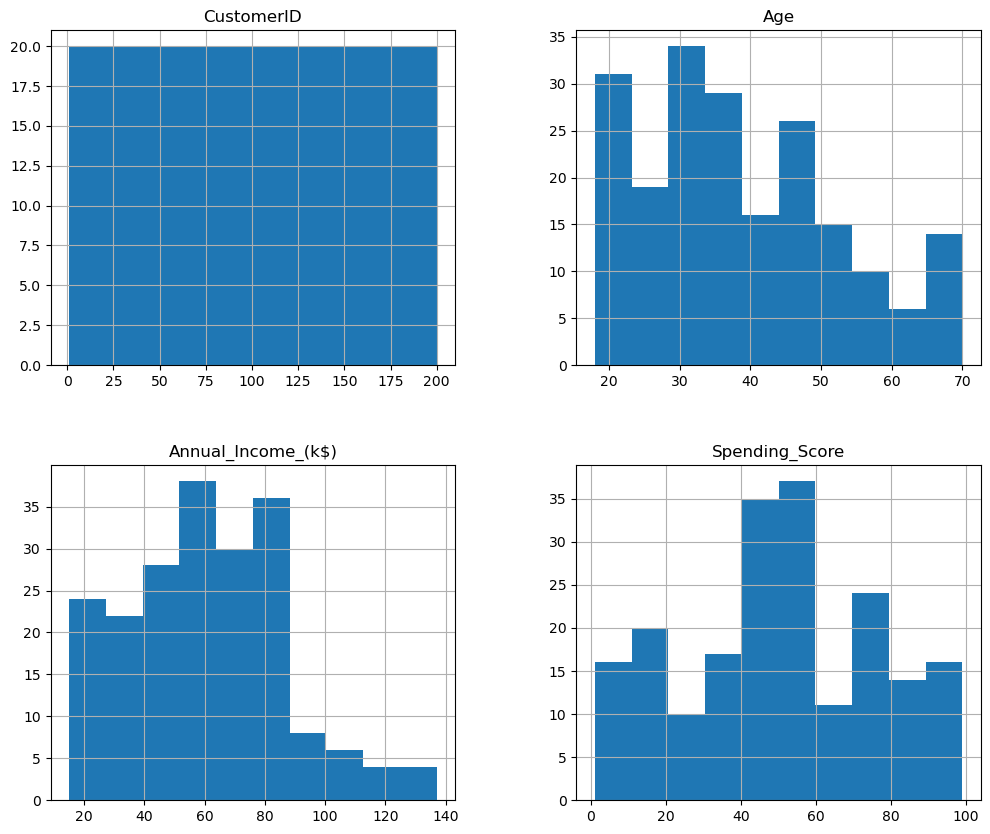

In [6]:
data.hist(figsize=(12,10))

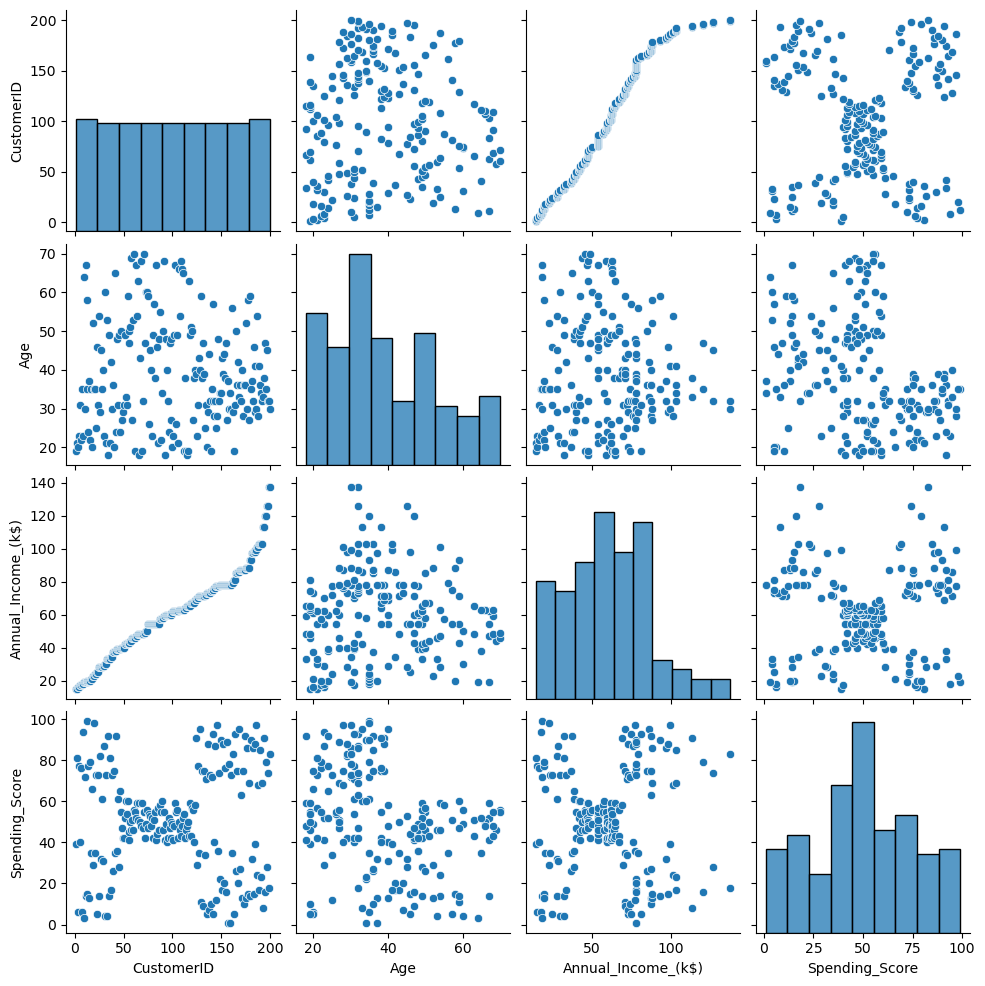

In [7]:
sns.pairplot(data)

In [8]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Genre']=le.fit_transform(data['Genre'])
data

CustomerID  Genre  Age  Annual_Income_(k$)  Spending_Score
0             1      1   19                  15              39
1             2      1   21                  15              81
2             3      0   20                  16               6
3             4      0   23                  16              77
4             5      0   31                  17              40
..          ...    ...  ...                 ...             ...
195         196      0   35                 120              79
196         197      0   45                 126              28
197         198      1   32                 126              74
198         199      1   32                 137              18
199         200      1   30                 137              83

[200 rows x 5 columns]

In [9]:
#Assign X and Y

x = data.iloc[:,:-1]
y = data.iloc[:,-1:].values
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (200, 4)

Y shape:	 (200, 1)


In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print("********Training Data Shape**********")
print('Training data-x-Shape:',xtrain.shape)
print('Training data-y-Shape:',ytrain.shape)
print("********Testing Data Shape**********")
print('Testing data(X-Input) Shape:',xtest.shape)
print('Testing data(y-Outcome) Shape:',ytest.shape)

********Training Data Shape**********
Training data-x-Shape: (160, 4)
Training data-y-Shape: (160, 1)
********Testing Data Shape**********
Testing data(X-Input) Shape: (40, 4)
Testing data(y-Outcome) Shape: (40, 1)


In [11]:
knn_model=KNeighborsClassifier(n_neighbors=3)
print('**********KNN Classifier Model**********')
print("Training Phase\n")
knn_model.fit(xtrain,ytrain)
print("Training is completed")
print("="*100)
print("Testing Phase\n")
ypred=knn_model.predict(xtest)
print("Predicted Class Label are:",ypred)
print('Test is also done')
print("="*100)

**********KNN Classifier Model**********
Training Phase

Training is completed
Testing Phase

Predicted Class Label are: [40 73 17 18  8 42  3 41 48 73  3 42 66  9 13 39 36 76 42 35 35 35 35 10
 27 10 47 51 42 40 24 48 40 48 54 42  5 24  7 46]
Test is also done


C:\ProgramData\anaconda3-1\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))

Accuracy Score:	 0.075

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0
 

C:\ProgramData\anaconda3-1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3-1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3-1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3-1\Lib\site-packages\sklearn\metr

In [13]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x.shape

(200, 4)